# 1.3.3 데이터 불러오기

In [11]:
import pandas as pd
from scipy.stats import trim_mean
import numpy as np
import wquantiles
path = '../data/state.csv'
state =pd.read_csv(path)

### 평균

In [12]:

state.head()
state['Population'].mean()



4.4

### 절사평균
#### - 극단에서 10%를 제거함

In [13]:

trim_mean(state['Population'],0.1)


4783697.125

### 중간값

In [14]:
#중간값
state['Population'].median()



4436369.5

### 가중평균

In [15]:
#인구에 가중치를 준 살인율에 대한 가중평균
np.average(state['Murder.Rate'],weights=state['Population'])


4.4

### 가중중간값

In [ ]:
#인구에 가중치를 준 살인율에 대한 가중중간값
wquantiles.median(state['Murder.Rate'],weights=state['Population'])

# 1.4.3 데이터불러오기

In [24]:
import pandas as pd
path = '../data/state.csv'
state =pd.read_csv(path)

### 표준편차

In [21]:

state['Population'].std()



6848235.347401142

### 사분위범위

In [22]:
state['Population'].quantile(0.75)- state['Population'].quantile(0.25)

4847308.0

### 중위절대편차

In [23]:
from statsmodels import robust
robust.scale.mad(state['Population'])

3849876.1459979336

### 1.5.1 백분위수와 상자그림

In [27]:
a= state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
a = pd.DataFrame(a)
a

,Murder.Rate
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


       pct_carrier_delay  pct_atc_delay  pct_weather_delay    airline
0               8.153226       1.971774           0.762097   American
1               5.959924       3.706107           1.585878   American
2               7.157270       2.706231           2.026706   American
3              12.100000      11.033333           0.000000   American
4               7.333333       3.365591           1.774194   American
...                  ...            ...                ...        ...
33463           6.186422       8.798491           1.651940  Southwest
33464           9.522167       3.591133           0.261084  Southwest
33465           9.164179       2.664179           0.343284  Southwest
33466           5.152293       1.964520           0.122817  Southwest
33467           3.964393       1.700479           0.019449  Southwest

[33468 rows x 4 columns]


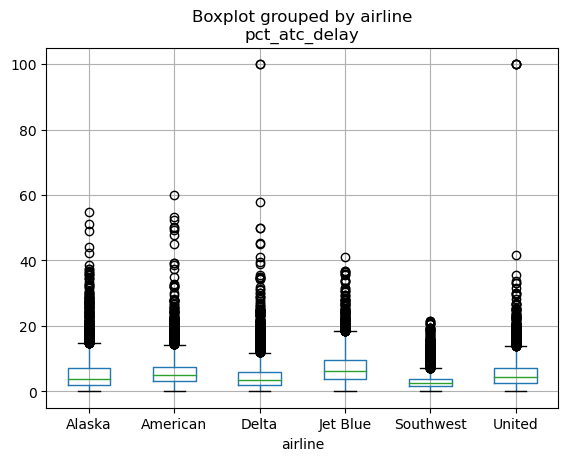

In [8]:
import pandas as pd
airline_stats = pd.read_csv('../data/airline_stats.csv')
print(airline_stats)
ax = airline_stats.boxplot(by='airline',column='pct_atc_delay')

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6fa0e9790>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6fa190220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6fa0e97f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6fa27d2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6fa0e2760>],
 'means': []}

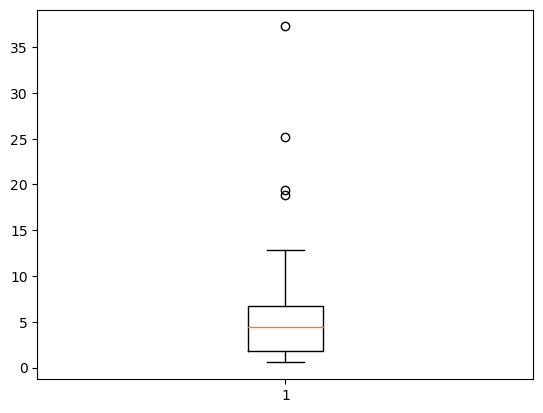

In [65]:
plt.boxplot(state['Population']/1_000_000)

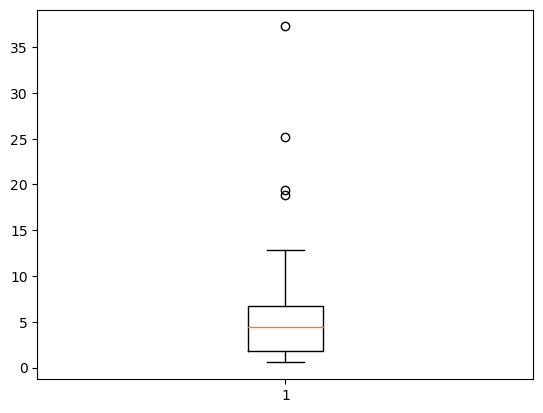

In [48]:
plt.boxplot(x)
plt.show()

In [66]:
binnedPopulation = pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Murder Rate (pre 100,000)')

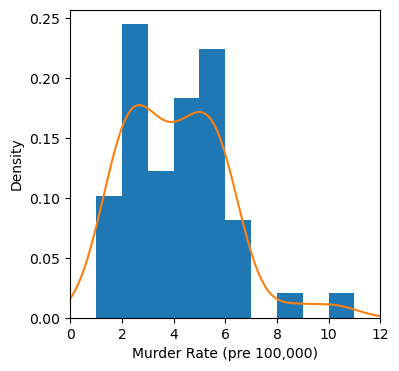

In [70]:
ax = (state['Murder.Rate']).plot.hist(density = True, xlim =[0,12],bins = range(1,12) ,figsize=(4,4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (pre 100,000)')

Text(0, 0.5, 'Count')

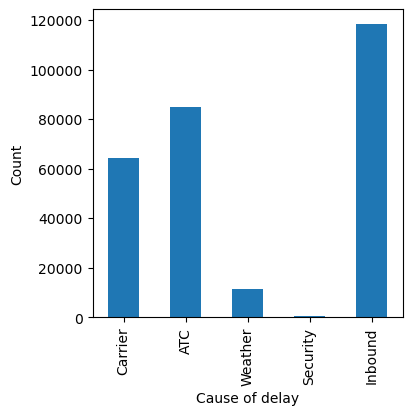

In [72]:
dfw = pd.read_csv('../data/dfw_airline.csv')
ax = dfw.transpose().plot.bar(figsize = (4,4), legend = False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [1]:
import matplotlib.pyplot as plt

In [71]:
import pandas as pd
sp500_px = pd.read_csv('../data/sp500_data.csv.gz')
sp500_sym = pd.read_csv('../data/sp500_sectors.csv')
# etfs = sp500_px.loc[sp500_px.index > '2012-07-01']
sp500_px = sp500_px.rename(columns={'Unnamed: 0':'date'})
etfs = sp500_px.loc[sp500_px['date'] > '2012-07-01', sp500_sym[sp500_sym['sector']== 'etf']['symbol']]

<AxesSubplot: >

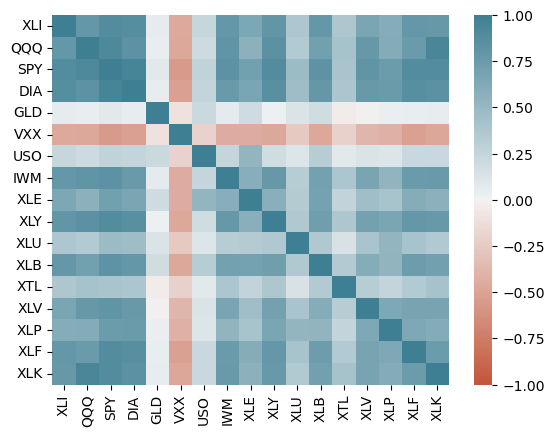

In [76]:
import seaborn as sns
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1, cmap=sns.diverging_palette(20,220,as_cmap=True))

In [8]:
import pandas as pd
lc_loans = pd.read_csv('../data/lc_loans.csv')
lc_loans
crosstab = lc_loans.pivot_table(index ='grade', columns='status', aggfunc=lambda x: len(x),margins=True)
df = crosstab.loc['A':'G',:].copy()
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'],axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

In [10]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


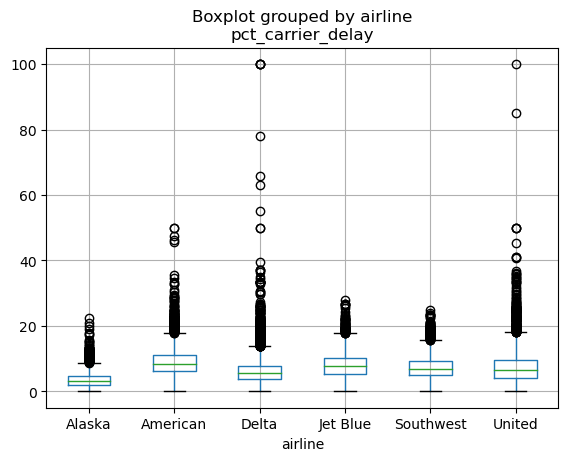

In [11]:
airline_stat = pd.read_csv('../data/airline_stats.csv')
ax = airline_stat.boxplot(by= 'airline', column = 'pct_carrier_delay')

In [18]:
import seaborn as sns
airline_stat = pd.read_csv('../data/airline_stats.csv')


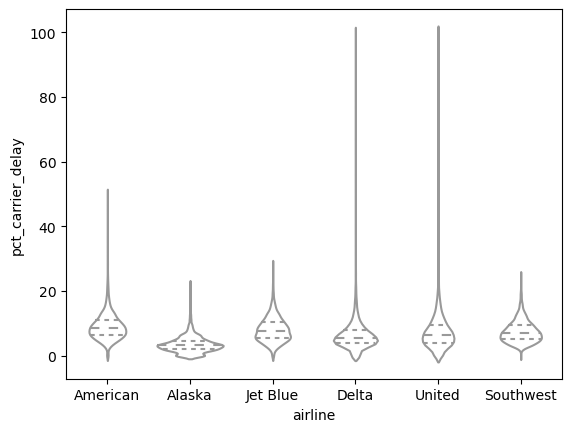

In [26]:
import matplotlib.pyplot as plt
quantiles =[0.75, 0.25]
ax = sns.violinplot(data = airline_stat, x= airline_stat['airline'],y = airline_stat['pct_carrier_delay'], inner = 'quartile', color = 'white')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
kc_tax = pd.read_csv('kc_tax.csv.gz')

FileNotFoundError: [Errno 2] No such file or directory: 'kc_tax.csv.gz'